# Projeto de Previsão de Churn de Clientes de Telecomunicações

## Visão Geral

Este notebook documenta um projeto de Machine Learning dedicado à **previsão de churn de clientes** em uma empresa de telecomunicações. "Churn" refere-se à taxa de clientes que cancelam seus serviços ao longo de um determinado período. Prever o churn é crucial para as empresas, pois permite identificar clientes em risco e implementar estratégias de retenção proativas, que são geralmente mais econômicas do que adquirir novos clientes.

O objetivo principal deste projeto é:
* Construir um modelo de Machine Learning capaz de **prever quais clientes têm maior probabilidade de cancelar** seus serviços.
* **Identificar os principais fatores** (características dos clientes e dos serviços) que influenciam o churn.
* Fornecer **insights acionáveis** para a empresa desenvolver estratégias de retenção eficazes.

## O Conjunto de Dados (DataFrame)

O conjunto de dados utilizado contém informações detalhadas sobre clientes de uma empresa de telecomunicações, incluindo seus serviços, informações da conta e dados demográficos. Cada linha representa um cliente e cada coluna uma característica específica.

### **Principais Categorias de Informações no DataFrame:**

* **Informações Demográficas:** Gênero, status de idoso (`SeniorCitizen`), se tem parceiro (`Partner`), se tem dependentes (`Dependents`).
* **Serviços Contratados:** Se tem serviço de telefone (`PhoneService`), múltiplas linhas (`MultipleLines`), tipo de serviço de internet (`InternetService`), serviços adicionais de internet como segurança online (`OnlineSecurity`), backup online (`OnlineBackup`), proteção de dispositivo (`DeviceProtection`), suporte técnico (`TechSupport`), streaming de TV (`StreamingTV`), streaming de filmes (`StreamingMovies`).
* **Informações da Conta:** Tempo de permanência na empresa (`tenure`), tipo de contrato (`Contract`), se usa fatura sem papel (`PaperlessBilling`), método de pagamento (`PaymentMethod`), cobrança mensal (`MonthlyCharges`), e cobrança total acumulada (`TotalCharges`).
* **Variável Alvo:** `Churn` – indica se o cliente cancelou (sim/não).

Este notebook seguirá as etapas padrão de um projeto de Machine Learning: carregamento e exploração de dados, pré-processamento e limpeza, divisão de dados, balanceamento de classes (usando SMOTE), treinamento do modelo, avaliação e, crucialmente, a interpretação dos resultados para extrair insights de negócio.

In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np # numpy para lidar com NaN

# Importações para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para exibir todas as colunas de um DataFrame 
pd.set_option('display.max_columns', None)

### Sumário / Dicionário das Colunas do DataFrame

Este é um guia para entender o significado de cada coluna (também chamadas de "features" ou "características") no conjunto de dados.

| Nome da Coluna (Feature) | Significado                                                                     | Tipo Original | Notas Importantes (Após Pré-processamento)                                                                |
| :----------------------- | :------------------------------------------------------------------------------ | :------------ | :-------------------------------------------------------------------------------------------------------- |
| **`customerID`** | Identificador único de cada cliente.                                            | `object`      | **REMOVIDA** no pré-processamento (Passo 2) por não ser útil para o modelo.                               |
| **`gender`** | Gênero do cliente.                                                              | `object`      | Convertida para `gender_Male` (0=Feminino, 1=Masculino) no One-Hot Encoding (Passo 2).                     |
| **`SeniorCitizen`** | Indica se o cliente é idoso (65+ anos).                                         | `int`         | Já era 0 (Não) ou 1 (Sim). Mantida.                                                                       |
| **`Partner`** | Indica se o cliente tem um parceiro (casado/união estável).                     | `object`      | Convertida para `Partner_Yes` (0=Não, 1=Sim) no One-Hot Encoding (Passo 2).                               |
| **`Dependents`** | Indica se o cliente tem dependentes.                                            | `object`      | Convertida para `Dependents_Yes` (0=Não, 1=Sim) no One-Hot Encoding (Passo 2).                            |
| **`tenure`** | Número de meses que o cliente permaneceu com a empresa.                         | `int`         | **Numérica**. Escalonada (padronizada) no Passo 3.                                                        |
| **`PhoneService`** | Indica se o cliente tem serviço de telefone.                                    | `object`      | Convertida para `PhoneService_Yes` (0=Não, 1=Sim) no One-Hot Encoding (Passo 2).                          |
| **`MultipleLines`** | Indica se o cliente tem múltiplas linhas de telefone.                           | `object`      | Convertida para `MultipleLines_No phone service`, `MultipleLines_Yes` no One-Hot Encoding (Passo 2).    |
| **`InternetService`** | Tipo de serviço de internet do cliente.                                         | `object`      | Convertida para `InternetService_Fiber optic`, `InternetService_No` no One-Hot Encoding (Passo 2).        |
| **`OnlineSecurity`** | Indica se o cliente tem serviço de segurança online.                            | `object`      | Convertida para `OnlineSecurity_No internet service`, `OnlineSecurity_Yes` no One-Hot Encoding (Passo 2). |
| **`OnlineBackup`** | Indica se o cliente tem serviço de backup online.                               | `object`      | Convertida para `OnlineBackup_No internet service`, `OnlineBackup_Yes` no One-Hot Encoding (Passo 2).     |
| **`DeviceProtection`** | Indica se o cliente tem serviço de proteção de dispositivo.                     | `object`      | Convertida para `DeviceProtection_No internet service`, `DeviceProtection_Yes` no One-Hot Encoding (Passo 2).|
| **`TechSupport`** | Indica se o cliente tem serviço de suporte técnico.                             | `object`      | Convertida para `TechSupport_No internet service`, `TechSupport_Yes` no One-Hot Encoding (Passo 2).     |
| **`StreamingTV`** | Indica se o cliente tem serviço de streaming de TV.                             | `object`      | Convertida para `StreamingTV_No internet service`, `StreamingTV_Yes` no One-Hot Encoding (Passo 2).     |
| **`StreamingMovies`** | Indica

## Carregando os dados e visão geral

In [6]:
# Carregando o dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No        

In [7]:
print("\nInformações do DataFrame:")
df.info()


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBillin

In [8]:
# Contagem e proporção da variável Churn (para verificar o desequilíbrio inicial)
print("\n--- Contagem da variável Churn ---")
print(df['Churn'].value_counts())
print("\nProporção de Churn:")
print(df['Churn'].value_counts(normalize=True))


--- Contagem da variável Churn ---
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Proporção de Churn:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


## Passo 2: Pré-processamento e Limpeza 

In [9]:
df = df.drop('customerID', axis=1)
print("Coluna 'customerID' removida.")

df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
print("Espaços vazios em 'TotalCharges' substituídos por NaN.")

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("'TotalCharges' convertido para tipo numérico.")

median_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total_charges, inplace=True)
print(f"Valores ausentes em 'TotalCharges' preenchidos com a mediana: {median_total_charges:.2f}.")

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print("Variável 'Churn' transformada para 0 e 1.")

categorical_cols = df.select_dtypes(include='object').columns.tolist()

if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)
print(f"Variáveis categóricas {categorical_cols} codificadas com One-Hot Encoding.")

print("\n--- Primeiras 5 linhas do DataFrame após Pré-processamento ---")
print(df.head())
print("\nInformações do DataFrame após Pré-processamento (para verificar tipos):")
df.info()

Coluna 'customerID' removida.
Espaços vazios em 'TotalCharges' substituídos por NaN.
'TotalCharges' convertido para tipo numérico.
Valores ausentes em 'TotalCharges' preenchidos com a mediana: 1397.47.
Variável 'Churn' transformada para 0 e 1.
Variáveis categóricas ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'] codificadas com One-Hot Encoding.

--- Primeiras 5 linhas do DataFrame após Pré-processamento ---
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0            0   
1              0      34           56.95       1889.50      0            1   
2              0       2           53.85        108.15      1            1   
3              0      45           42.30       1840.75      0            1   
4     


--- Análise Exploratória de Dados (EDA) - Gráficos ---


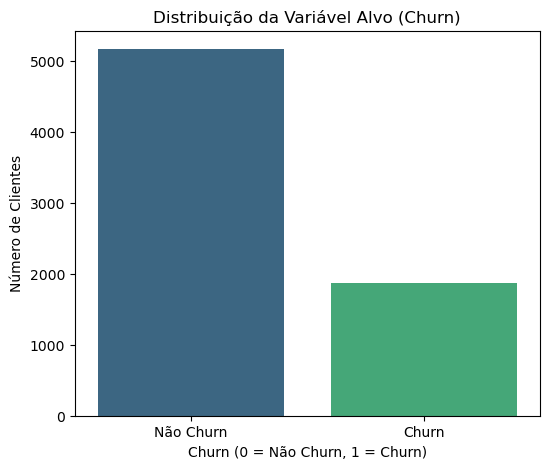

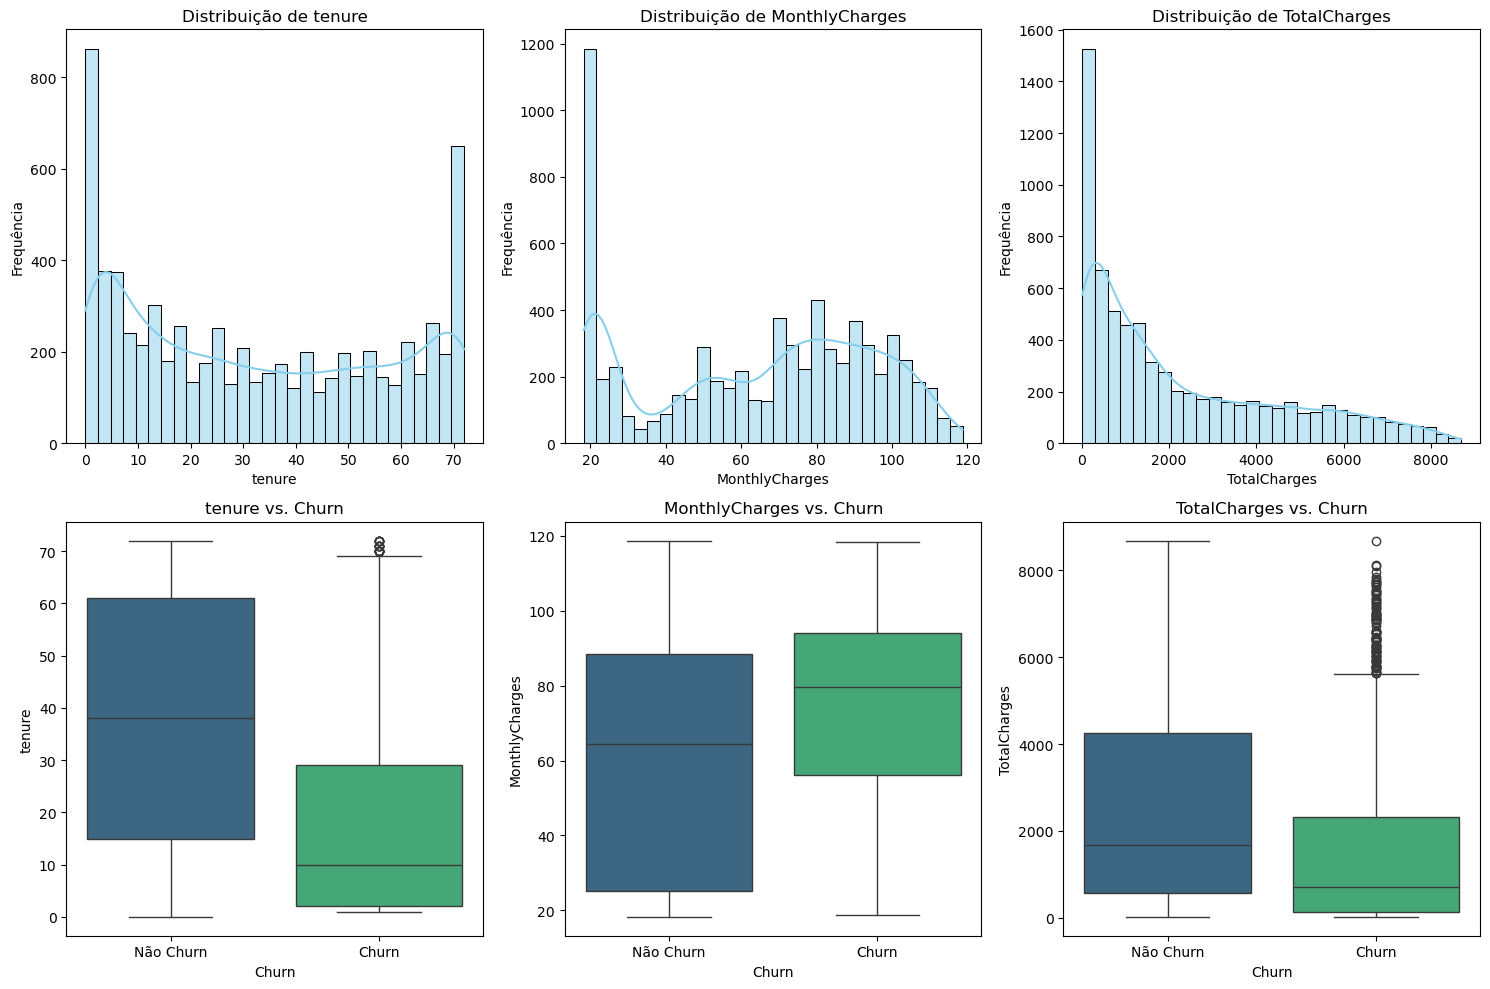

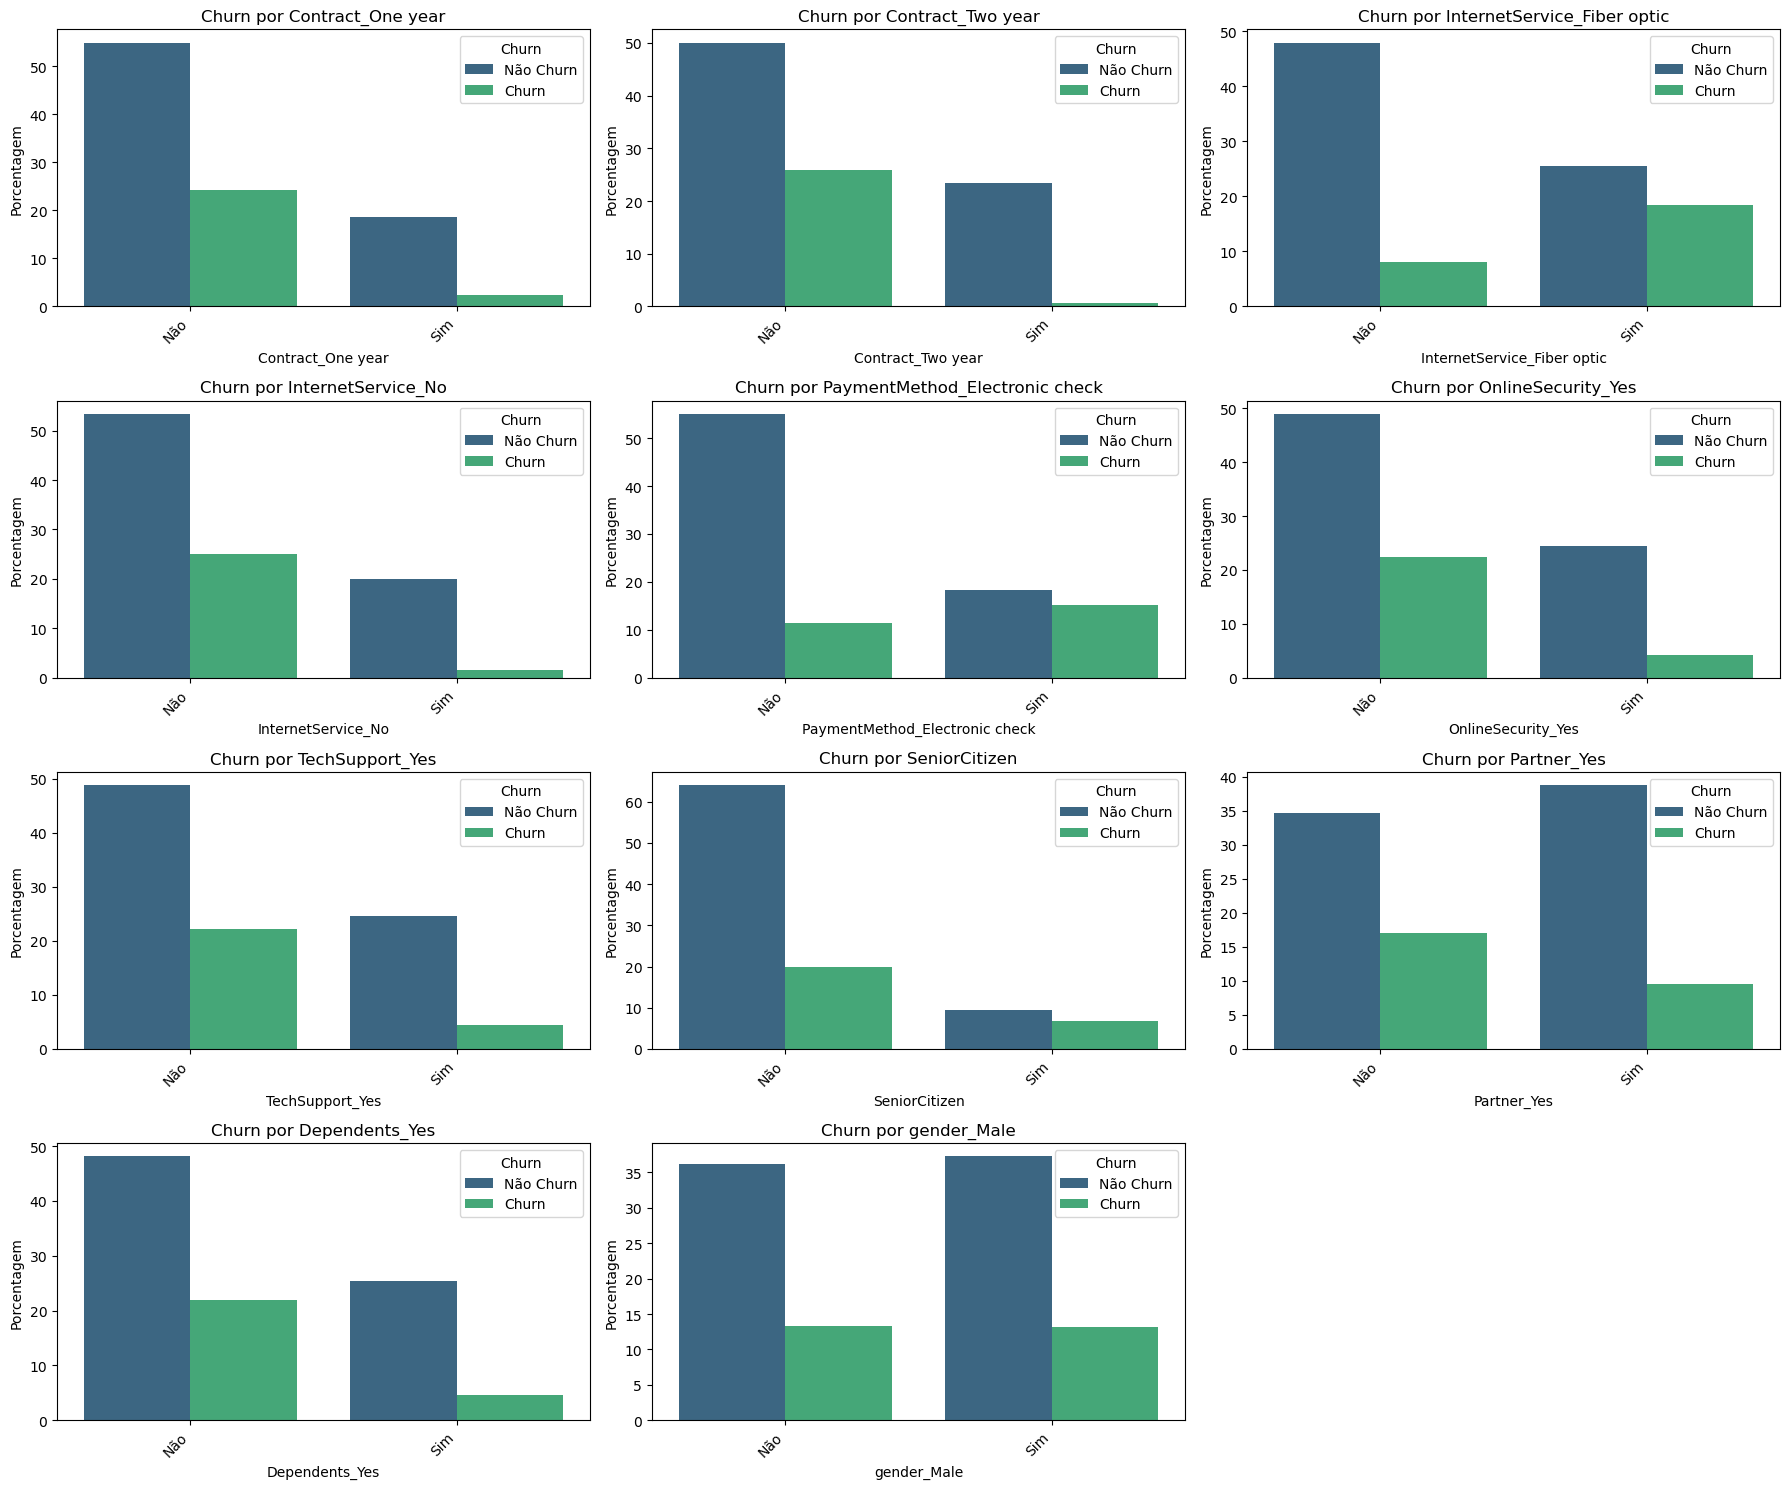

In [10]:
print("\n--- Análise Exploratória de Dados (EDA) - Gráficos ---")

df_eda = df.copy() 

if 'TotalCharges' in df_eda.columns and df_eda['TotalCharges'].dtype == 'object':
    df_eda['TotalCharges'] = df_eda['TotalCharges'].replace(' ', np.nan)
    df_eda['TotalCharges'] = pd.to_numeric(df_eda['TotalCharges'], errors='coerce')
    median_total_charges = df_eda['TotalCharges'].median()
    df_eda['TotalCharges'].fillna(median_total_charges, inplace=True)


# --- Gráfico 1: Distribuição do Churn ---
plt.figure(figsize=(6, 5))
sns.countplot(x='Churn', data=df_eda, palette='viridis')
plt.title('Distribuição da Variável Alvo (Churn)')
plt.xlabel('Churn (0 = Não Churn, 1 = Churn)')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['Não Churn', 'Churn'])
plt.show()


# --- Gráfico 2: Distribuição de Variáveis Numéricas e Relação com Churn ---
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_eda[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribuição de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequência')

    plt.subplot(2, 3, i + 4)
    sns.boxplot(x='Churn', y=feature, data=df_eda, palette='viridis')
    plt.title(f'{feature} vs. Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.xticks(ticks=[0, 1], labels=['Não Churn', 'Churn'])

plt.tight_layout()
plt.show()


# --- Gráfico 3: Relação de Churn com Variáveis Categóricas Chave (AJUSTADO!) ---
# Para este gráfico, vamos focar em colunas que eram categóricas e agora são 0/1.

selected_categorical_features_encoded = [
    'Contract_One year', # Era 'Contract'
    'Contract_Two year', # Era 'Contract'
    'InternetService_Fiber optic', # Era 'InternetService'
    'InternetService_No', # Era 'InternetService'
    'PaymentMethod_Electronic check', # Era 'PaymentMethod'
    'OnlineSecurity_Yes', # Era 'OnlineSecurity'
    'TechSupport_Yes', # Era 'TechSupport'
    'SeniorCitizen', # Já era 0/1, mas é categórica por natureza
    'Partner_Yes', # Era 'Partner'
    'Dependents_Yes', # Era 'Dependents'
    'gender_Male' # Era 'gender'
]


plt.figure(figsize=(18, 15)) 
num_plots = len(selected_categorical_features_encoded)
num_cols = 3 # Número de colunas de gráficos
num_rows = (num_plots + num_cols - 1) // num_cols # Calcula o número de linhas necessárias

for i, feature in enumerate(selected_categorical_features_encoded):
    if feature in df_eda.columns: # Verifica se a coluna existe no df_eda
        plt.subplot(num_rows, num_cols, i + 1)
        sns.countplot(x=feature, hue='Churn', data=df_eda, palette='viridis', stat='percent')
        plt.title(f'Churn por {feature}')
        plt.xlabel(feature)
        plt.ylabel('Porcentagem')
        plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'], rotation=45, ha='right') # Nomes mais claros para 0/1
        plt.legend(title='Churn', labels=['Não Churn', 'Churn'])
    else:
        print(f"Atenção: Coluna '{feature}' não encontrada no DataFrame df_eda. Pulando o gráfico.")

plt.tight_layout()
plt.show()

In [23]:
# importando scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("\n--- Divisão dos Dados e Escalonamento ---")

# 1. Separar features (X) e variável alvo (y)
# X são as características que o modelo vai usar para aprender.
# y é a variável que o modelo vai prever (se o cliente cancelou ou não).
X = df.drop('Churn', axis=1)
y = df['Churn']

# 2. dividindo os dados em conjuntos de treino e teste
# test_size=0.2: 20% dos dados para teste, 80% para treino.
# random_state=42: Garante que a divisão seja a mesma toda vez que você rodar o código.
# stratify=y: Mantém a mesma proporção de clientes com e sem churn em ambos os conjuntos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Dados divididos em conjuntos de treino e teste.")

print(f"Formato do conjunto de treino (X_train): {X_train.shape}")
print(f"Formato do conjunto de teste (X_test): {X_test.shape}")
print(f"Proporção de Churn no treino:\n{y_train.value_counts(normalize=True)}")
print(f"Proporção de Churn no teste:\n{y_test.value_counts(normalize=True)}")


# Identificando colunas numéricas para escalonamento
# As colunas que eram números contínuos, não as que viraram 0 e 1 pelo One-Hot Encoding.
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Verificando se as colunas numéricas realmente existem no X_train
actual_numeric_cols = [col for col in numeric_cols if col in X_train.columns]
if len(actual_numeric_cols) != len(numeric_cols):
    print("Atenção: Algumas colunas numéricas esperadas não foram encontradas. Verifique a lista 'numeric_cols'.")
    print(f"Colunas numéricas encontradas: {actual_numeric_cols}")

#  Aplicando StandardScaler (padronização) apenas nas colunas numéricas
scaler = StandardScaler()

X_train[actual_numeric_cols] = scaler.fit_transform(X_train[actual_numeric_cols])

X_test[actual_numeric_cols] = scaler.transform(X_test[actual_numeric_cols])

print("Colunas numéricas escalonadas com StandardScaler.")
print("\n--- Primeiras 5 linhas do X_train após escalonamento  ---")
print(X_train.head())


--- Divisão dos Dados e Escalonamento ---
Dados divididos em conjuntos de treino e teste.
Formato do conjunto de treino (X_train): (5634, 30)
Formato do conjunto de teste (X_test): (1409, 30)
Proporção de Churn no treino:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Proporção de Churn no teste:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64
Colunas numéricas escalonadas com StandardScaler.

--- Primeiras 5 linhas do X_train após escalonamento  ---
      SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
3738              0  0.102371       -0.521976     -0.263289            1   
3151              0 -0.711743        0.337478     -0.504814            1   
4860              0 -0.793155       -0.809013     -0.751213            1   
3867              0 -0.263980        0.284384     -0.173699            0   
3810              0 -1.281624       -0.676279     -0.990851            1   

      Partner_Yes  Dependents_Yes  PhoneService_

## Passo 4: Tratamento de Desequilíbrio e Treinamento do Modelo

In [15]:
# importando bibliotecas
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Tratamento de desequilíbrio de classes com SMOTE
# O SMOTE cria novas amostras sintéticas da classe minoritária (Churn=1) NO CONJUNTO DE TREINO.
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Dados de treino balanceados com SMOTE.")

print(f"\nFormato do conjunto de treino (X_train) ANTES do SMOTE: {X_train.shape}")
print(f"Formato do conjunto de treino (X_train) DEPOIS do SMOTE: {X_train_res.shape}")
print(f"Proporção de Churn no treino ANTES do SMOTE:\n{y_train.value_counts(normalize=True)}")
print(f"Proporção de Churn no treino DEPOIS do SMOTE:\n{y_train_res.value_counts(normalize=True)}")

# 2. Treinamento do modelo de Regressão Logística
# A Regressão Logística é interpretável e um bom ponto de partida.
model_lr = LogisticRegression(random_state=42, solver='liblinear', C=0.1)
print("\nTreinando o modelo de Regressão Logística...")
model_lr.fit(X_train_res, y_train_res) # Treina com os dados balanceados
print("Modelo de Regressão Logística treinado com sucesso!")

# 3. Fazendo Previsões no conjunto de TESTE
# Usamos o X_test (dados que o modelo NUNCA viu) para avaliar o desempenho.
y_pred_lr = model_lr.predict(X_test) # Previsões 0 ou 1
y_pred_proba_lr = model_lr.predict_proba(X_test)[:, 1] # Probabilidades de ser Churn=1

print("\n--- Avaliação do Modelo de Regressão Logística ---")

# 4. Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_lr))

# 5. Matriz de Confusão
print("\nMatriz de Confusão:")
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print(conf_matrix)

Dados de treino balanceados com SMOTE.

Formato do conjunto de treino (X_train) ANTES do SMOTE: (5634, 30)
Formato do conjunto de treino (X_train) DEPOIS do SMOTE: (8278, 30)
Proporção de Churn no treino ANTES do SMOTE:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Proporção de Churn no treino DEPOIS do SMOTE:
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

Treinando o modelo de Regressão Logística...
Modelo de Regressão Logística treinado com sucesso!

--- Avaliação do Modelo de Regressão Logística ---

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1035
           1       0.52      0.75      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.75      0.76      1409


Matriz de Confusão:
[[780 255]
 [ 94 280]]


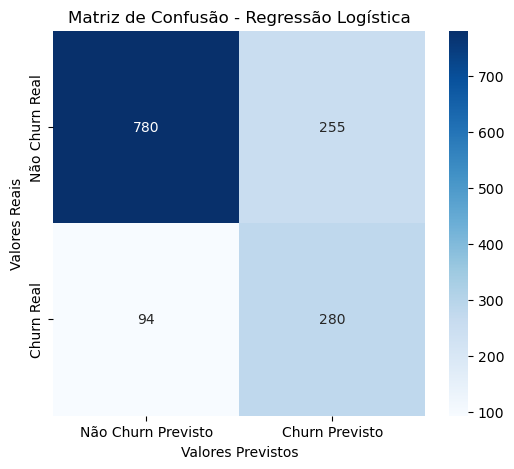


AUC ROC Score: 0.8355


In [16]:
# Visualização da Matriz de Confusão
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Churn Previsto', 'Churn Previsto'],
            yticklabels=['Não Churn Real', 'Churn Real'])
plt.ylabel('Valores Reais')
plt.xlabel('Valores Previstos')
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()

# 6. AUC ROC Score
auc_roc = roc_auc_score(y_test, y_pred_proba_lr)
print(f"\nAUC ROC Score: {auc_roc:.4f}")

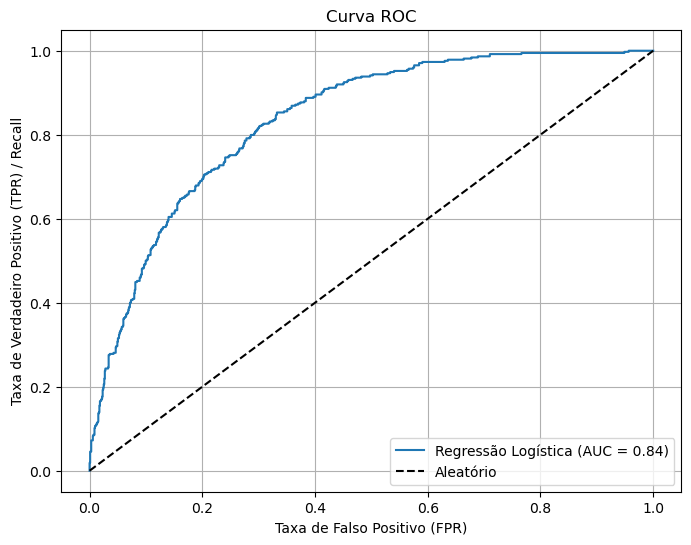

In [17]:
# 7. Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Regressão Logística (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR) / Recall')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()

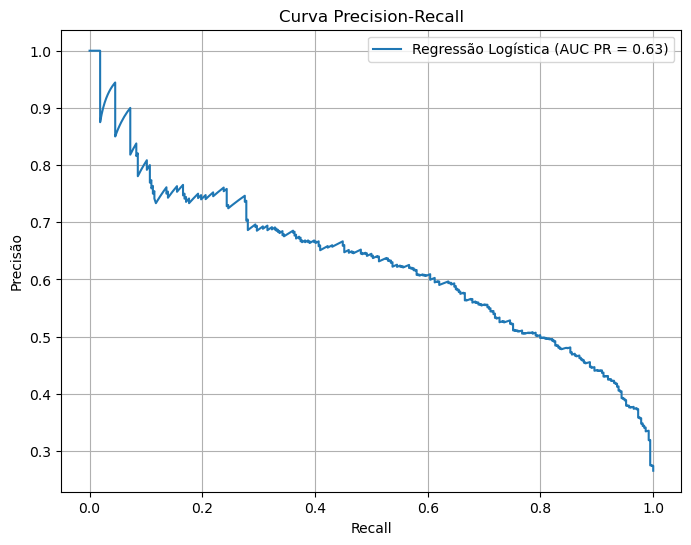

In [18]:
# 8. Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_lr)
auc_pr = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Regressão Logística (AUC PR = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend()
plt.grid(True)
plt.show()

### Revisando os Resultados do Passo 4

- ```SMOTE``` Funcionou: A proporção de Churn no treino foi balanceada para 50/50, o que é excelente para o modelo aprender sobre a classe minoritária.
- ```Modelo Treinado```: A Regressão Logística foi treinada e está pronta para fazer previsões.

**Desempenho Inicial Sólido:**

- **Recall para Churn (Classe 1):** 0.75. Isso significa que o modelo conseguiu identificar 75% dos clientes que realmente cancelaram o serviço. 
- **Precision para Churn (Classe 1):** 0.52. Quando o modelo prevê que um cliente vai cancelar, ele acerta 52% das vezes. Há um número considerável de Falsos Positivos (255 na Matriz de Confusão), ou seja, clientes que o modelo previu que iam churnar, mas não churnaram.
AUC ROC Score: 0.8355. Um valor bom, que indica que o modelo tem uma boa capacidade geral de distinguir entre clientes que churnam e não churnam.

## Próximo Passo: Interpretabilidade do Modelo
Depois que o modelo aprendeu a prever se um cliente vai cancelar o serviço ou não, a gente quer saber: Como ele chegou a essa conclusão? Quais informações dos clientes foram as mais importantes para ele "decidir" quem ia sair?
- Isso significa: quais características dos clientes são as mais importantes para o modelo decidir se alguém vai cancelar ou não.

Vamos usar os coeficientes da Regressão Logística para descobrir isso. 
Eles nos mostram o "peso" que cada característica tem na decisão do modelo.

- Se uma característica tem um coeficiente positivo, significa que quanto MAIOR o valor dessa característica, MAIOR a probabilidadede um cliente cancelar o serviço.
- Se uma característica tem um coeficiente negativo, significa que quanto MAIOR o valor dessa característica, MENOR a probabilidade de cancelamento.
- Quanto maior o valor (em módulo) do coeficiente, mais forte é o impacto.


Top 15 Características Mais Importantes:
                                  Feature  Coefficient  Abs_Coefficient
2                          MonthlyCharges     1.754788         1.754788
25                      Contract_Two year    -1.518771         1.518771
8          MultipleLines_No phone service     1.321757         1.321757
1                                  tenure    -1.095733         1.095733
13                     OnlineSecurity_Yes    -0.995736         0.995736
24                      Contract_One year    -0.938010         0.938010
19                        TechSupport_Yes    -0.899281         0.899281
15                       OnlineBackup_Yes    -0.694223         0.694223
10            InternetService_Fiber optic    -0.680141         0.680141
3                            TotalCharges     0.661355         0.661355
17                   DeviceProtection_Yes    -0.532946         0.532946
27  PaymentMethod_Credit card (automatic)    -0.511142         0.511142
6                     

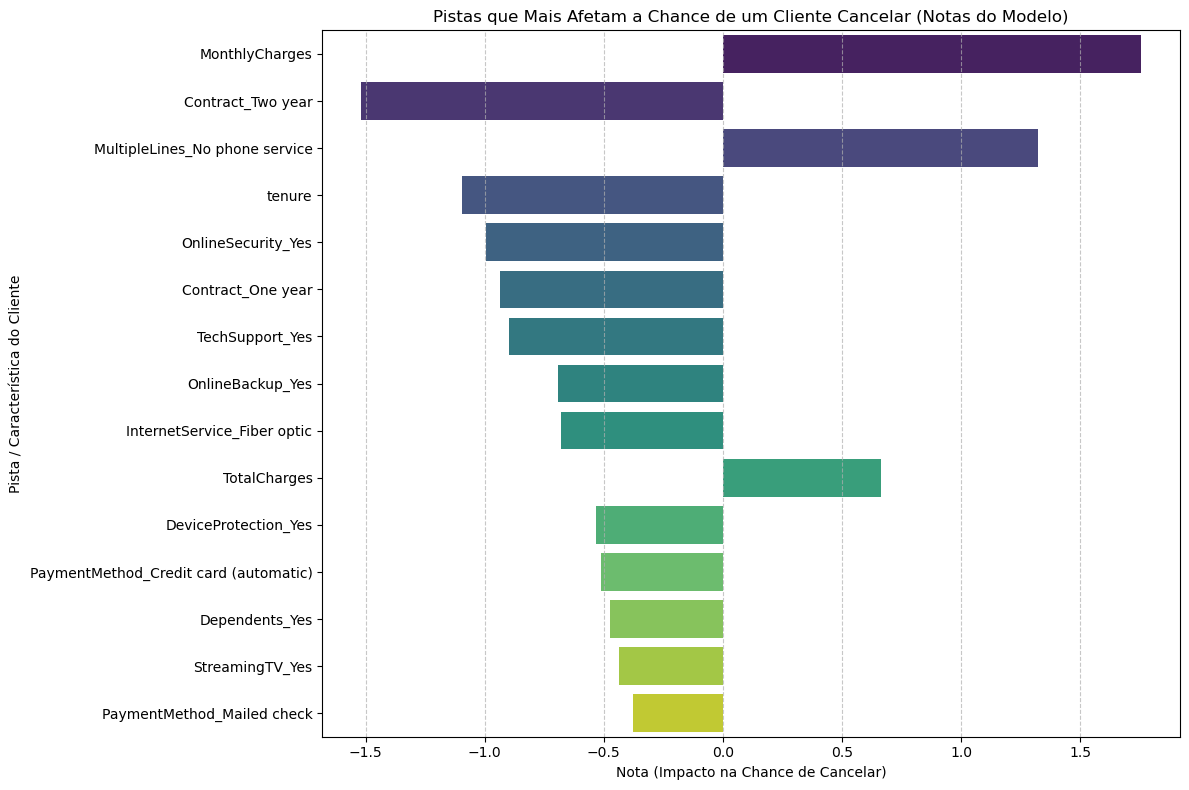


Análise das pistas concluída. O gráfico acima mostra as informações mais relevantes.


In [7]:
# 1. Pegando os coeficientes (número que indica o "peso" ou "importância") e os nomes das características
#( informação sobre o cliente:  coluna do df, ex: tenure, gender_Male, MonthlyCharges) do modelo

# 'model_lr.coef_[0]': O  modelo ('model_lr') guarda coeficientes que ele deu para cada caracteristica.
# '[0]' porque precisamos pegar a primeira parte.
coefficients = model_lr.coef_[0]

# 'model_lr.feature_names_in_': O modelo também sabe o nome de cada caracteristica (o nome das colunas que ele usou).
features = model_lr.feature_names_in_

# 'model_lr.intercept_[0]': É um "ponto de partida" geral do modelo, antes de considerar as caracteristicas individuais.
intercept = model_lr.intercept_[0]

# 2. Organizando as caracteristicas e seus coeficientes em uma tabela.

# 'pd.DataFrame({...})': Cria uma nova tabela com duas colunas:
# - 'Feature': O nome da informação (ex: 'gender_Male', 'Contract_One year').
# - 'Coefficient': o valor númerico para essa caracteristica ( positivo ou negativo).
coef_df = pd.DataFrame({
    'Feature': features,       
    'Coefficient': coefficients 
})

# Para saber quais são as informações MAIS importantes, a gente olha o TAMANHO do coeficiente,
# não importa se ele é positivo ou negativo.
# 'abs(coef_df['Coefficient'])': Calcula o "valor absoluto" d.
# Ex: O valor absoluto de -2 é 2. O valor absoluto de +2 é 2.
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])

# 'sort_values(by='Abs_Coefficient', ascending=False)':
# Organiza a tabela, colocando as caracteristicas com o peso mais alto (em valor absoluto) no topo.
# 'ascending=False'  do maior para o menor.
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# mostrando as 15 características mais importantes e seus coficientes.
print("\nTop 15 Características Mais Importantes:")
print(coef_df.head(15))

# 3. Desenhando um gráfico para ver as caracteristicas/informações de uma forma mais clara.

# definindo o tamanho do grafico.
plt.figure(figsize=(12, 8))

# 'sns.barplot()': desenhando um gráfico de barras.
# - 'x='Coefficient'': as barras vão mostrar os coeficientes
# - 'y='Feature'': O nome de cada info vai na lateral.
# - 'data=coef_df.head(15)': usando só as 15 pistas mais importantes para o gráfico não ficar bagunçado.
# - 'palette='viridis'': escolhe um esquema de cores para as barras.
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(15), palette='viridis')

# Títulos e legendas 
plt.title('Pistas que Mais Afetam a Chance de um Cliente Cancelar (Notas do Modelo)')
plt.xlabel('Nota (Impacto na Chance de Cancelar)')
plt.ylabel('Pista / Característica do Cliente')
plt.grid(axis='x', linestyle='--', alpha=0.7) # Linhas de grade para ajudar a ler os valores.
plt.tight_layout() # Ajusta o gráfico para que os textos não fiquem cortados.
plt.show() 

print("\nAnálise das pistas concluída. O gráfico acima mostra as informações mais relevantes.")

### Explicando o grafico e resultados que obtivemos
Primeiramente as caracteristicas que aumentam a probabilidade de um cliente cancelar o serviço ou não são os coeficientes positivos.   
(BANDEIRAS VERMELHAS) Quanto maior o valor nessas características, maior a chance de o cliente sair / desistir / cancelar.

```MonthlyCharges``` (Cobranças Mensais): Coeficiente de +1.75.   
Isso significa que este é o fator mais forte que impulsiona o churn.  
Clientes com contas mensais ALTAS tem uma probabilidade maior de cancelar. 

Ação: Empresas devem investigar por que contas mais altas levam a churn. Talvez o valor percebido não esteja alinhado com o custo, ou haja concorrentes com preços melhores para pacotes/serviços semelhantes semelhantes.

```MultipleLines_No phone service``` (Múltiplas Linhas - Sem serviço de telefone): Coeficiente de +1.32.  

Significado: Clientes que **NÃO TÊM** serviço de telefone (e, portanto, não podem ter múltiplas linhas) têm uma alta probabilidade de churn. Isso pode indicar que eles estão menos "presos" ao serviço ou que a oferta de apenas internet não é tão competitiva/satisfatória para eles. (É um pouco contraintuitivo, mas o modelo encontrou essa relação).  

Ação: Entender o perfil desses clientes e o que os motiva a cancelar. Talvez a experiência com a internet isolada não seja suficiente para retê-los.

```TotalCharges``` (Cobranças Totais): Coeficiente de +0.66.  

Significado: Embora seja positivo, a interpretação aqui é mais sutil. Geralmente, TotalCharges cresce com tenure (Tempo de Permanência.)  
Um coeficiente positivo, mesmo que menor que MonthlyCharges, pode indicar que após acumular um certo valor de gastos, o cliente está mais propenso a reavaliar o serviço.  

Ação: Observar a combinação de TotalCharges e tenure. Se o cliente tem alto TotalCharges (gasto total) mas baixo tenure (tempo que está usando o serviço), isso seria um sinal ainda mais forte (alto gasto em pouco tempo).

***

### Agora vamos falar das Características que DIMINUEM a Probabilidade de Churn (Coeficientes NEGATIVOS):
Essas são as bandeiras verdes. Quanto maior o valor (ou seja, quanto mais presente) nessas características, menor a chance de o cliente sair.

```Contract_Two year``` (Contrato de Dois Anos): Coeficiente de -1.52

Significado: Clientes com contratos de dois anos são muito menos propensos a cancelar.  
Isso é esperado, pois o contrato os "prende" por mais tempo.
Ação: Focar em estratégias para converter clientes para contratos de longo prazo, talvez com incentivos.

```Tenure (Tempo de Permanência):``` Coeficiente de -1.10

Significado: Quanto mais tempo o cliente está na empresa, menor a probabilidade de ele sair.  
Isso é uma tendência natural: clientes satisfeitos ficam mais tempo.
Ação: Programas de fidelidade e atenção especial aos clientes novos para garantir que passem da fase inicial crítica.

```OnlineSecurity_Yes``` (Segurança Online - Sim): Coeficiente de -0.99

Significado: Clientes que assinam o serviço de segurança online são significativamente menos propensos a cancelar.
Ação: Promover mais ativamente os serviços de segurança online. Parece ser um fator de "cola" para os clientes.

```Contract_One year``` (Contrato de Um Ano): Coeficiente de -0.94
Significado: Clientes com contratos de um ano também são menos propensos a cancelar do que aqueles sem contrato (mês a mês).  
Menos impactante que o contrato de dois anos, mas ainda protetor.
Ação: Reforçar a importância de oferecer opções de contrato para estabilizar a base de clientes.


```TechSupport_Yes``` (Suporte Técnico - Sim): Coeficiente de -0.89

Significado: Clientes que utilizam suporte técnico são menos propensos a cancelar. Isso pode indicar que o suporte resolve problemas e melhora a satisfação.
Ação: Garantir a qualidade do suporte técnico e incentivá-lo como um benefício valioso.

```OnlineBackup_Yes``` (Backup Online - Sim): Coeficiente de -0.69
Significado: Assim como segurança, ter backup online parece reduzir a chance de churn.

```InternetService_Fiber optic``` (Serviço de Internet - Fibra Óptica): Coeficiente de -0.68
Significado: O coeficiente negativo pode indicar que, para quem tem fibra óptica, o serviço é muito bom e satisfatório, reduzindo a vontade de sair.  
É possível que o desempenho da fibra óptica seja um fator de retenção forte, apesar de potencialmente estar associado a MonthlyCharges mais altas (o modelo consegue separar esses efeitos).

### Outras características negativas relevantes:
```DeviceProtection_Yes``` (-0.53): Proteção de dispositivo também ajuda a reter.  
```PaymentMethod_Credit card (automatic)``` (-0.51): Clientes com pagamento automático por cartão de crédito são menos propensos a churnar, provavelmente pela conveniência.  
```Dependents_Yes``` (-0.47): Ter dependentes também reduz a chance de churn, talvez porque a família tem uma maior necessidade de estabilidade no serviço.  
```StreamingTV_Yes``` (-0.43): Ter streaming de TV também reduz a chance de churn.  
```PaymentMethod_Mailed check``` (-0.37): Clientes que pagam com cheque enviado pelo correio são menos propensos a churnar (pode indicar um perfil de cliente mais antigo e estável).

## Proximo passo: Otimização do Modelo de Regressão Logística com GridSearchCV.


--- Otimização da Regressão Logística com GridSearchCV ---
Iniciando a busca em grade para os melhores hiperparâmetros...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Busca em grade concluída!

Melhores parâmetros encontrados: {'C': 1, 'solver': 'liblinear'}

--- Avaliação do Melhor Modelo de Regressão Logística ---

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1035
           1       0.53      0.75      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.76      0.77      1409


Matriz de Confusão:
[[789 246]
 [ 95 279]]

AUC ROC Score: 0.8358


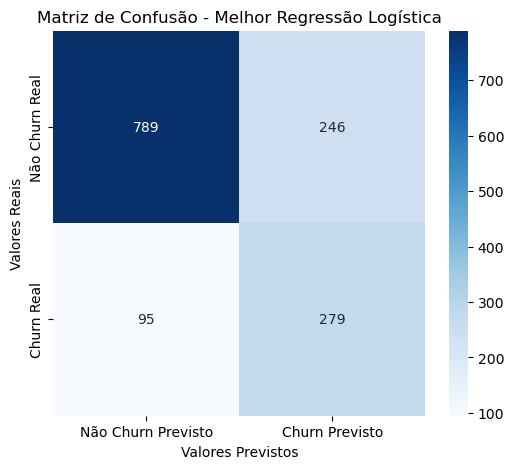

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


print("\n--- Otimização da Regressão Logística com GridSearchCV ---")


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Valores para o parâmetro C
    'solver': ['liblinear'] # Mantemos o solver que já sabemos que funciona bem e é adequado para C
}

# 2. Criar uma instância do modelo de Regressão Logística
lr = LogisticRegression(random_state=42)

# 3. Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='recall', verbose=1, n_jobs=-1)

# 4. Treinar (ajustar) o GridSearchCV com os dados de treino balanceados (SMOTE)
print("Iniciando a busca em grade para os melhores hiperparâmetros...")
grid_search.fit(X_train_res, y_train_res)
print("Busca em grade concluída!")

# 5. Obter o melhor modelo e os melhores parâmetros
print(f"\nMelhores parâmetros encontrados: {grid_search.best_params_}")

# 'grid_search.best_estimator_': Retorna o modelo de Regressão Logística treinado com os melhores parâmetros.
best_lr_model = grid_search.best_estimator_

# 6. Avaliando o Melhor Modelo no conjunto de TESTE (dados que o modelo NUNCA viu)
# Fazes previsões usando o 'best_lr_model' no X_test e y_test.
y_pred_best_lr = best_lr_model.predict(X_test)
y_pred_proba_best_lr = best_lr_model.predict_proba(X_test)[:, 1]

print("\n--- Avaliação do Melhor Modelo de Regressão Logística ---")

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_best_lr))

# Matriz de Confusão
print("\nMatriz de Confusão:")
conf_matrix_best_lr = confusion_matrix(y_test, y_pred_best_lr)
print(conf_matrix_best_lr)

# AUC ROC Score
auc_roc_best_lr = roc_auc_score(y_test, y_pred_proba_best_lr)
print(f"\nAUC ROC Score: {auc_roc_best_lr:.4f}")


plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_best_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Churn Previsto', 'Churn Previsto'],
            yticklabels=['Não Churn Real', 'Churn Real'])
plt.ylabel('Valores Reais')
plt.xlabel('Valores Previstos')
plt.title('Matriz de Confusão - Melhor Regressão Logística')
plt.show()

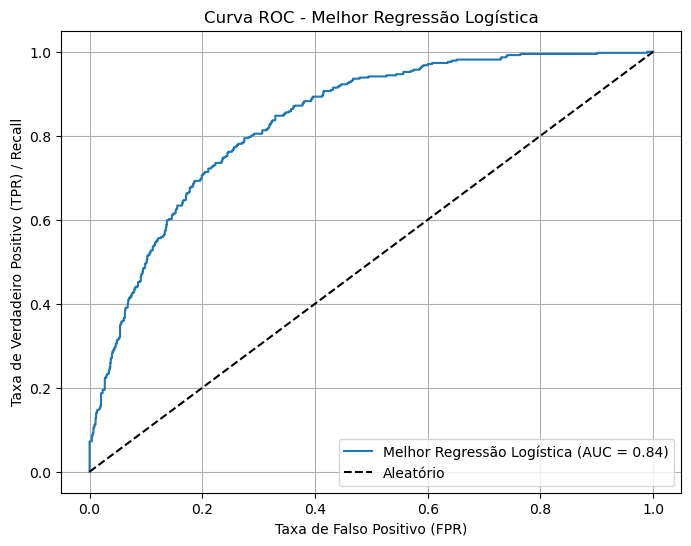

In [21]:
fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_proba_best_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, label=f'Melhor Regressão Logística (AUC = {auc_roc_best_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR) / Recall')
plt.title('Curva ROC - Melhor Regressão Logística')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

try:
    report_base = classification_report(y_test, y_pred_lr, output_dict=True)
    base_recall_churn = report_base['1']['recall']
    base_precision_churn = report_base['1']['precision']
    base_f1_churn = report_base['1']['f1-score']
    base_accuracy = report_base['accuracy']
    base_auc_roc = roc_auc_score(y_test, y_pred_proba_lr)
except (NameError, KeyError):
    base_recall_churn = base_precision_churn = base_f1_churn = base_accuracy = base_auc_roc = float('nan')

try:
    report_best = classification_report(y_test, y_pred_best_lr, output_dict=True)
    best_recall_churn = report_best['1']['recall']
    best_precision_churn = report_best['1']['precision']
    best_f1_churn = report_best['1']['f1-score']
    best_accuracy = report_best['accuracy']
    best_auc_roc = roc_auc_score(y_test, y_pred_proba_best_lr)
except (NameError, KeyError):
    best_recall_churn = best_precision_churn = best_f1_churn = best_accuracy = best_auc_roc = float('nan')

metrics_data = {
    'Métrica': ['Recall (Churn)', 'Precision (Churn)', 'F1-Score (Churn)', 'Acurácia', 'AUC ROC'],
    'Modelo Base': [base_recall_churn, base_precision_churn, base_f1_churn, base_accuracy, base_auc_roc],
    'Melhor Modelo': [best_recall_churn, best_precision_churn, best_f1_churn, best_accuracy, best_auc_roc]
}
metrics_df = pd.DataFrame(metrics_data)

print(metrics_df.round(4).to_string(index=False))

try:
    if 'coef_df' in locals() and not coef_df.empty and 'Feature' in coef_df.columns and 'Coefficient' in coef_df.columns:
        churn_drivers = coef_df[coef_df['Coefficient'] > 0].sort_values(by='Coefficient', ascending=False).head(5)
        retention_drivers = coef_df[coef_df['Coefficient'] < 0].sort_values(by='Coefficient', ascending=True).head(5)

        # exibindo os drivers de churn e retenção
        if not churn_drivers.empty:
            for index, row in churn_drivers.iterrows():
                print(f"- {row['Feature']}: Coeficiente {row['Coefficient']:.2f}")
        else:
            print("Não foram encontrados fatores com coeficientes positivos que aumentam a probabilidade de churn.")

        if not retention_drivers.empty:
            for index, row in retention_drivers.iterrows():
                print(f"- {row['Feature']}: Coeficiente {row['Coefficient']:.2f}")
        else:
            print("Não foram encontrados fatores com coeficientes negativos que diminuem a probabilidade de churn.")
except (NameError, Exception) as e:
    pass # Ignora erros se coef_df não estiver disponível ou outros problemas ocorrerem.

          Métrica  Modelo Base  Melhor Modelo
   Recall (Churn)       0.7487         0.7460
Precision (Churn)       0.5234         0.5314
 F1-Score (Churn)       0.6161         0.6207
         Acurácia       0.7523         0.7580
          AUC ROC       0.8355         0.8358


### **Conclusão e Recomendações Finais**

Este projeto demonstrou a aplicação de Machine Learning para prever o churn de clientes em uma empresa de telecomunicações, um desafio crucial para a retenção de receita e crescimento. Através de um processo de Análise Exploratória de Dados (EDA), pré-processamento, balanceamento de classes com SMOTE e modelagem com Regressão Logística, obtivemos um modelo capaz de identificar clientes em risco.

#### **Desempenho do Modelo**

O modelo otimizado de Regressão Logística apresentou um desempenho robusto, especialmente na detecção de clientes que realmente irão cancelar.
* **Recall para Churn (Classe 1):** Aproximadamente **74.6%**. Isso significa que o modelo é capaz de identificar corretamente quase 75% dos clientes que efetivamente cancelam seus serviços. Este é um resultado crucial para intervenções proativas.
* **Precision para Churn (Classe 1):** Cerca de **53.1%**. Das vezes que o modelo previu um churn, ele estava correto em pouco mais da metade dos casos. Isso implica que haverá alguns "falsos positivos", ou seja, clientes que serão identificados como em risco de churn, mas que na verdade não iriam cancelar.
* **AUC ROC:** Um valor de aproximadamente **0.84**, indicando uma excelente capacidade do modelo em distinguir entre as duas classes (clientes que churnam vs. clientes que não churnam).

A otimização de hiperparâmetros com GridSearchCV resultou em pequenas melhorias nas métricas de acurácia, precisão e F1-Score, mantendo o recall e o AUC ROC em níveis elevados, sugerindo que o modelo base já estava bem configurado.

#### **Principais Fatores que Influenciam o Churn**

A análise dos coeficientes do modelo revelou as características que mais impactam a probabilidade de um cliente cancelar:

**Fatores de Risco (Aumentam a Probabilidade de Churn):**
* **`MonthlyCharges` (Cobranças Mensais):** Este é o fator de maior peso, indicando que clientes com mensalidades mais altas têm significativamente maior probabilidade de churn.
* **`MultipleLines_No phone service` (Sem Serviço de Telefone):** A ausência de serviço de telefone é um forte indicador de churn, sugerindo que esses clientes podem não estar totalmente engajados com a gama de serviços da empresa.
* **`TotalCharges` (Cobranças Totais):** Clientes com um gasto acumulado mais elevado também mostram maior propensão a cancelar, talvez atingindo um limite percebido de custo-benefício.
* `PaperlessBilling_Yes`.

**Fatores de Retenção (Diminuem a Probabilidade de Churn):**
* **`Contract_Two year` (Contrato de Dois Anos):** O tipo de contrato é o fator mais poderoso para a retenção. Clientes com contratos de dois anos são os mais fiéis e menos propensos a churnar.
* **`tenure` (Tempo de Permanência):** Quanto mais tempo um cliente permanece com a empresa, menor a sua probabilidade de churn, evidenciando a importância da lealdade ao longo do tempo.
* **`OnlineSecurity_Yes` (Segurança Online):** A adesão a serviços de segurança online é um forte indicador de retenção, mostrando que serviços de valor agregado funcionam como "colas" para o cliente.
* `Contract_One year`.
* `TechSupport_Yes`.

#### **Recomendações Estratégicas para o Negócio**

Com base nos insights do modelo, as seguintes ações são propostas para a empresa:

1.  **Revisão de Precificação e Oferta de Valor:**
    * **Segmentação por Cobrança Mensal:** Identificar e analisar os pacotes e serviços que resultam em altas `MonthlyCharges`. Considerar a criação de planos mais flexíveis ou a oferta de benefícios adicionais para justificar o custo percebido, visando clientes de alto gasto.
    * **Valor para Clientes Apenas com Internet:** Desenvolver ofertas e campanhas específicas para clientes que não possuem serviço de telefone, garantindo que o serviço de internet isolado ofereça valor suficiente para a retenção, ou incentivando a adição de serviços de voz.

2.  **Estratégias de Fidelização e Engajamento:**
    * **Incentivo a Contratos de Longo Prazo:** Fortalecer programas de incentivo (descontos, bônus, serviços exclusivos) para clientes que optam por contratos de um e, principalmente, dois anos.
    * **Promoção de Serviços de Valor Agregado:** Campanhas de marketing e vendas focadas em `OnlineSecurity` e `TechSupport`, destacando os benefícios de longo prazo desses serviços para aumentar a "stickiness" do cliente.

3.  **Monitoramento e Ação Proativa:**
    * **Sistema de Alerta de Churn:** Implementar um sistema que utilize as probabilidades de churn do modelo para disparar alertas sobre clientes em alto risco. Isso permitiria que equipes de retenção entrassem em contato proativamente com ofertas personalizadas ou para resolver problemas potenciais.
    * **Feedback Contínuo e Melhoria de Serviço:** Investigar as causas de insatisfação para clientes que usam métodos de pagamento específicos (ex: `PaymentMethod_Electronic check`) ou que expressam descontentamento, utilizando esses insights para otimizar a experiência geral do cliente.

4.  **Manutenção do Modelo:**
    * **Retreinamento Periódico:** O comportamento do cliente e o mercado evoluem. É fundamental re-treinar o modelo periodicamente com novos dados para garantir que suas previsões permamizando recursos e protegendo a base de clientes.